# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

Submitted by: Neha Biswas


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Understanding the structure of the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Univ_Texas/Python_Fundamentals/Project_FoodHub/foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observations**:

The DataFrame has 9 columns. Each row corresponds to an order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# DataFrame.shape attribute gives us the no of rows and columns present in the dataset as a tuple, 
# where 0th element corresponds to the no of rows and 1st element the no of columns in the dataframe.

print('No. of Rows present in the dataset: {},\nNo. of Columns present in the dataset: {}.'.format(df.shape[0],df.shape[1]))

No. of Rows present in the dataset: 1898,
No. of Columns present in the dataset: 9.


**Observations**:

    No. of Rows present in the dataset is 1898
    No. of Columns present in the Dataset is 9.



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# info() function gives a concise summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations**:


*  The columns have int, float, or object datatypes.
* 4 columns that are of int datatype are order_id, customer_id, food_preparation_time, and delivery_time.
* 4 columns that are of object datatype are restaurant_name, cuisine_type, day_of_the_week, and rating. 
*   There is 1 column whose datatype is float, namely cost_of_the_order.
*   Total no of records present in the dataframe is 1898.
*   All the columns have 1898 non-null values, which shows us no data is missing for any of the columns.




    













### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# The isnull() function checks if the value is a null. If it is a null value, it returns True, else returns False.
# The sum() function adds all the True's(ie 1s) to give us the no. of missing data in the column. 
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations**:


*   There are no missing values of data in any of the columns. 




### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# The below code gives us the statistical summary of the column 'food_preparation_time'
print(df['food_preparation_time'].describe()[['min','mean','max']])
print('')

print('The minimum time taken to prepare the food once an order is placed are around {} mins.'
      .format(min(df['food_preparation_time'])))
print('The average time taken to prepare the food once an order is placed is around {} mins.'
      .format(round(np.mean(df['food_preparation_time']),2)))
print('The maximum time taken to prepare the food once an order is placed is around {} mins.'
      .format(max(df['food_preparation_time'])))

min     20.00000
mean    27.37197
max     35.00000
Name: food_preparation_time, dtype: float64

The minimum time taken to prepare the food once an order is placed are around 20 mins.
The average time taken to prepare the food once an order is placed is around 27.37 mins.
The maximum time taken to prepare the food once an order is placed is around 35 mins.


**Observations**:

| Food Preparation Time  | Time (mins) |
| -----------------------| ----------- |
| Minimum Time Required  |         20  |
| Average Time Required  |         27  |
| Maximum Time Required  |         35  |



In [ ]:
# The describe() function gives us the statistical summary of the columns 
# such as count, average value, minimum value, maximum value, etc.
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
# Since, the columns order_id, customer_id are key columns, 
# so the below code gives us the statistical summary of the numerical columns (ie, of datatypes int and float).
# .T is transpose attribute which gives us the transpose of rows and columns of a dataframe.
df[['cost_of_the_order','food_preparation_time','delivery_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


**Observations**:

*   The columns order_id and customer_id are key columns. Since, pandas interpret these id columns as 'int' hence, these columns are included in the summary table. 
*   The minimum value for the cost of the order is around \$5 and the maximum cost is around \$35 with a standard deviation of around 7.5.
*   The mean and median values for all three columns are very close to each other for the respective columns.
*   The mean value for the cost of the order is slightly more than the median value.
*   The minimum time required for the food to be prepared after an order is placed is 20 mins and maximum time is 35 mins. The average time is close to the median value of 27 mins with a standard deviation of around 4.6.
*   The minimum time required for the food to be delivered is 15 mins and maximum time is 33 mins. The average time is close to the median value of 25 mins with a standard deviation of around 4.97.











### **Question 5:** How many orders are not rated? [1 mark]

The total number of orders which are not rated is 736.0 .


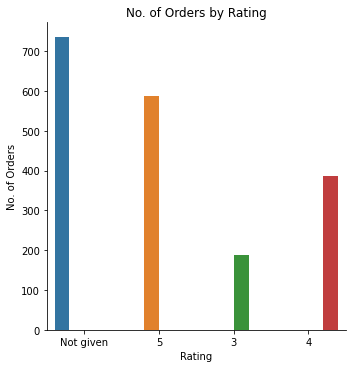

In [ ]:
# Calculating the no of orders rated:
rated_data= pd.DataFrame({'Count':df['rating'].value_counts(),'Percentage':(df['rating'].value_counts()/df.shape[0])*100})
print('The total number of orders which are not rated is',rated_data.loc['Not given']['Count'],'.')

# Plotting No. of Orders for different rating values:
sns.catplot(data = df, x='rating', hue='rating', kind='count').set(title='No. of Orders by Rating')
plt.xlabel('Rating')
plt.ylabel('No. of Orders')
plt.show()

**Observations**:

*   There are 736 orders which do not have any rating (i.e, ~39% of the total orders have no rating).

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

####Order ID

In [ ]:
# Checking the number of unique order IDs:
print('There are',df['order_id'].nunique(),'unique orders present in the dataset.')

There are 1898 unique orders present in the dataset.


**Observations**:

*  There are 1898 orders present in the dataset

####Customer ID

In [ ]:
# Checking the number of unique customers:
print('There are',df['customer_id'].nunique(),'unique customers present in the dataset.')  ## Complete the code to find out number of unique Customer ID

There are 1200 unique customers present in the dataset.


**Observations**:

*  There are 1200 unique customers present in the dataset.
*  Some customers have placed multiple orders. 

####Restaurant Name

In [ ]:
# Checking the number of unique restaurants:
print('There are',df['restaurant_name'].nunique(),'unique restaurants present in the dataset.')  ## Complete the code to find out number of unique Restaurant Name


There are 178 unique restaurants present in the dataset.


**Observations**:

*  There are 178 unique restaurants present in the dataset.

####Cuisine type

In [ ]:
# Checking the number of unique cuisine types:
print('There are',df['cuisine_type'].nunique(),'unique cuisine types present in the dataset.')

There are 14 unique cuisine types present in the dataset.


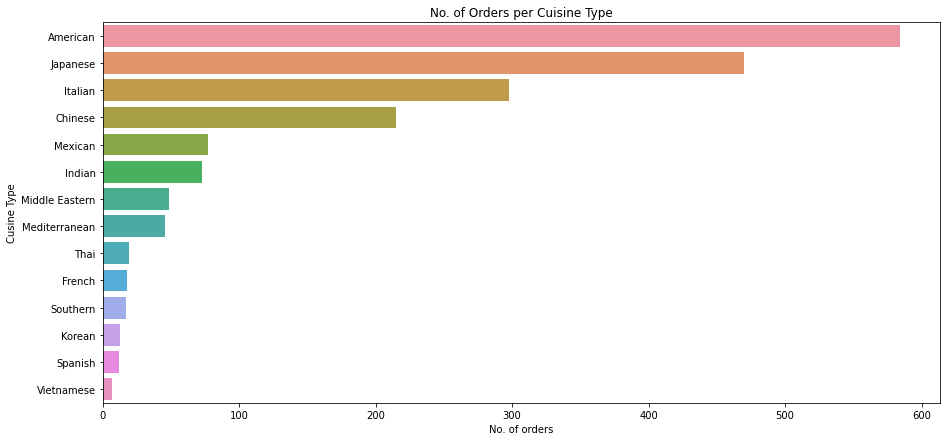

In [ ]:
# Countplot for  No.of order vs Cuisine Type.
plt.figure(figsize=(15,7))
sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index).set(title='No. of Orders per Cuisine Type')
plt.ylabel('Cusine Type')
plt.xlabel('No. of orders')
plt.show()

In [ ]:
# Checking the Most and Least popular Cuisines:
print(pd.Series(df['cuisine_type'].value_counts().head(),name='Most popular Cuisines by no of orders'))
print('')
print(pd.Series(df['cuisine_type'].value_counts().tail(),name='Least popular Cuisines by no of orders'))

American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: Most popular Cuisines by no of orders, dtype: int64

French        18
Southern      17
Korean        13
Spanish       12
Vietnamese     7
Name: Least popular Cuisines by no of orders, dtype: int64


**Observations**: 

*   There are 14 unique cuisine types present in the dataset.
*   The top 5 most liked cuisines are American, Japanese, Italian, Chinese, and Mexican.
*   Cuisines with the least no of orders are Korean, Spanish, and Vietnamese.
*   Most popular cuisine (concerning no of orders ) is American with 584 orders and the least popular cuisine is Vietnamese with only 7 orders.





####Rating

In [ ]:
# Checking the unique values for the column 'rating'
list(df['rating'].unique())

['Not given', '5', '3', '4']

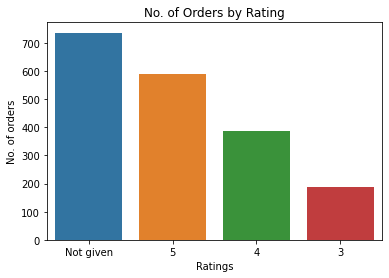

In [ ]:
# Countplot for No. of order vs Rating:
sns.countplot(data = df, x = 'rating', order=df['rating'].value_counts().index).set(title='No. of Orders by Rating') 
plt.xlabel('Ratings')
plt.ylabel('No. of orders')
plt.show()

In [ ]:
print(rated_data)

           Count  Percentage
Not given    736   38.777661
5            588   30.979979
4            386   20.337197
3            188    9.905163


**Observations**: 

*   There are 4 distinct values for rating, ie, 3,4,5, and  'Not Given'.
*   The highest value of rating is 5 and the lowest is 3.
*   The no of orders which are not rated is the highest and stands at around 39% of the total data.
*   For the orders which are rated: 
        *   The highest rating received is 5 and the lowest is 3.
        *   The no of orders with rating = 5 is highest at around 31%.
        *   The no of orders with ratings 4 and 3 come next in line with around 20% and 10% respectively.






####Cost of the order

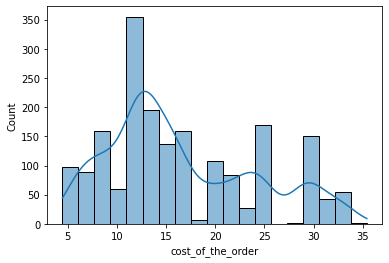

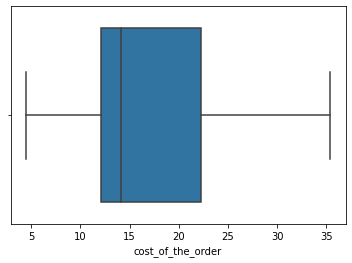

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'cost_of_the_order':
sns.histplot(data = df, x ='cost_of_the_order', kde= True)
plt.show()
sns.boxplot(data = df, x ='cost_of_the_order')
plt.show() 

In [ ]:
# Calculating the no. of expensive orders:
df.loc[df['cost_of_the_order']>30].shape

(100, 9)

**Observations**: 

*   The maximum value for the cost of the order is around \$35 and the minimum value for the same is around $5.
*   The boxplot for the cost of the order is slightly left-skewed with no outliers.
*   The median value of the cost of orders is around \$14.
*   The average value of the cost of orders (almost \$16.5) is slightly higher than its median value (\$14.14).
*   There are around 100 expensive orders ranging approximately from \$30 to \$35.  
*   The histogram for this column shows there are multiple modes.







####Day of the week

In [ ]:
# Checking the unique values for the column 'day_of_the_week'
print(df['day_of_the_week'].unique())

['Weekend' 'Weekday']


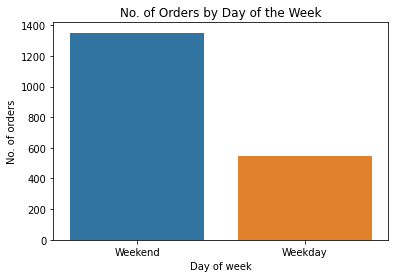

In [ ]:
# Countplot for No.of orders vs Day of the week:
sns.countplot(data = df, x = 'day_of_the_week').set(title='No. of Orders by Day of the Week')
plt.xlabel('Day of week')
plt.ylabel('No. of orders')
plt.show()

In [ ]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

**Observations**: 

*   The days of the week have been represented by 2 categories, i.e 'Weekday' and 'Weekend' 
*   The no of orders placed on weekends is greater than twice the no placed on weekdays.


####Food Preparation Time

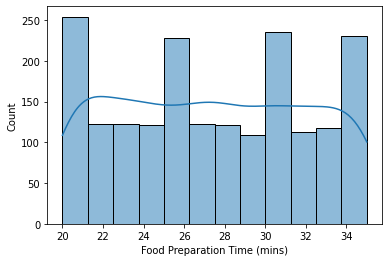

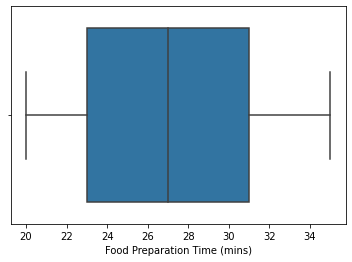

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'food_preparation_column':
sns.histplot(data = df, x ='food_preparation_time', kde= True)
plt.xlabel('Food Preparation Time (mins)')
plt.show()
sns.boxplot(data = df, x ='food_preparation_time')
plt.xlabel('Food Preparation Time (mins)')
plt.show()

**Observations**: 

*   The minimum time taken to prepare the food is 20 mins while the maximum time taken is around 35 mins.
*   The boxplot for the time taken to prepare the food is almost symmetrical with no outliers and a median value of 27 mins.
*  The average time taken to prepare the food is almost equal to the median value of the same.

####Delivery Time

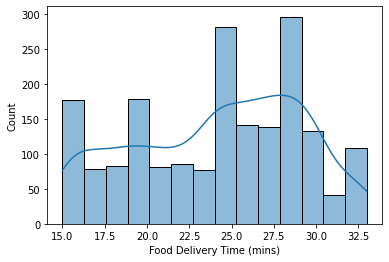

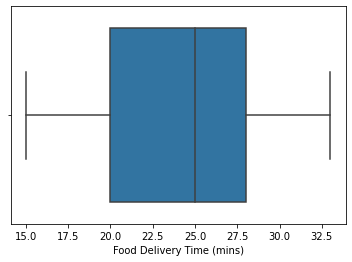

In [ ]:
# Histplot and Boxplot to show the distribution of data for the column 'delivery_time':
sns.histplot(data = df, x ='delivery_time', kde= True)
plt.xlabel('Food Delivery Time (mins)')
plt.show()
sns.boxplot(data = df, x='delivery_time' )
plt.xlabel('Food Delivery Time (mins)')
plt.show()

In [ ]:
#Counting the no of orders where the delivery time is more than 30 mins:
df.loc[df['delivery_time']>30].shape

(149, 9)

**Observations**:

*   The minimum food delivery time is 15 mins and the maximum delivery time is 33 mins. 
*   The distribution for food delivery time is slightly right-skewed with a median value of 25 mins and no outliers. 
*   The average time required to deliver the food (almost 24 mins) is slightly lower than its median value.
*   There are 149 orders which take more than 30 mins to be delivered.






### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Calculating top 5 restaurants and their no of orders: 
top_5_restaurants = df['restaurant_name'].value_counts().sort_values(ascending=False).head()
print(top_5_restaurants)
print('')

print('The top 5 restaurants in terms of the number of orders received are : ')
print(top_5_restaurants.index.tolist())


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

The top 5 restaurants in terms of the number of orders received are : 
['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm']


In [ ]:
# Calculating the percentage of orders placed from the top 5 restaurants:
(top_5_restaurants.sum()/df.shape[0])*100

33.40358271865121

**Observations**:


*  The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
*   Almost 33% of orders are placed from the above restaurants.






### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
weekend_cuisine_popularity = df.loc[df['day_of_the_week']=='Weekend','cuisine_type'].value_counts().sort_values(ascending= False)
print(weekend_cuisine_popularity)
print('')

print('The most popular cuisine on weekends is {}.'.format(weekend_cuisine_popularity.index[0]))

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

The most popular cuisine on weekends is American.


**Observations**:

* The most popular cuisine on weekends with respect to number of orders is  'American'.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
order_val_greater_20 =df.loc[df['cost_of_the_order']>20].shape[0]
percent_greater_20 = round((order_val_greater_20/df.shape[0])*100,2)
print('The no of orders having cost greater than $20 is {}.'.format(order_val_greater_20))
                       
print('The percentage of orders that cost more than $20 is {}%'.format(percent_greater_20))

The no of orders having cost greater than $20 is 555.
The percentage of orders that cost more than $20 is 29.24%


**Observations**:

*   The no of orders having a cost greater than $20 is 555.

*   Almost 29.24% of the orders cost more than $20.



### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
print('The mean order delivery time is {} mins'.format(round(df['delivery_time'].describe()['mean'],2)))

The mean order delivery time is 24.16 mins


**Observations**:

* The mean order delivery time is 24.16 mins.





### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
most_frequent_customers = df['customer_id'].value_counts().sort_values(ascending=False).head(3)
most_frequent_customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

**Observations**:


*   The top 3 frequent customers are as follows: 

| Customer Id | No of orders placed |
| ----------- | ------------------- |
|       52832 |                  13 |
|       47440 |                  10 |
|       83287 |                   9 |



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


####Cuisine vs Cost of the order

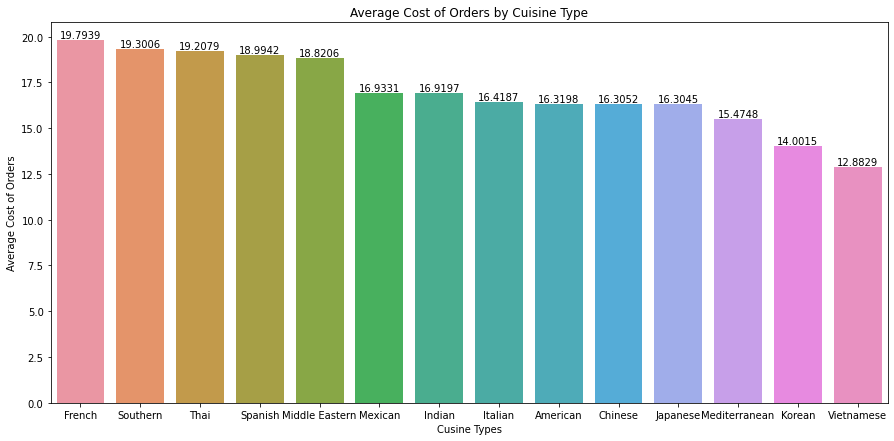

In [ ]:
#Average cost of orders by cuisine type:
cuisine_cost_df = df.groupby(['cuisine_type'])['cost_of_the_order'].mean().reset_index().sort_values(by='cost_of_the_order', ascending=False)

plt.figure(figsize = (15,7))
graph = sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order', ci=False, order=cuisine_cost_df['cuisine_type'])
plt.xlabel('Cusine Types')
plt.ylabel('Average Cost of Orders')

for i in graph.containers: 
  graph.bar_label(i,)

plt.title('Average Cost of Orders by Cuisine Type')
plt.show()

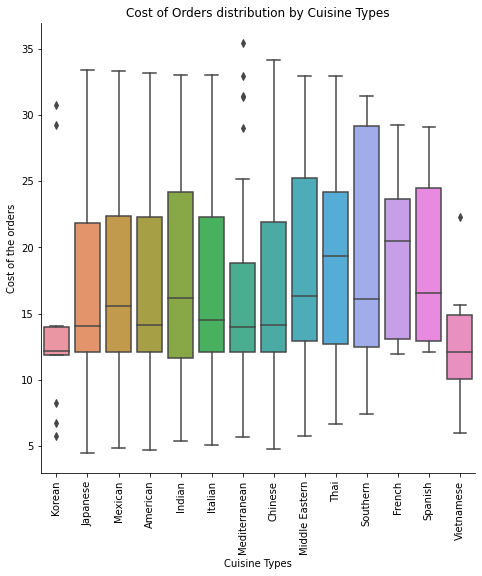

In [ ]:
sns.catplot(data=df, x='cuisine_type', y='cost_of_the_order', kind='box', height=7)
plt.xlabel('Cuisine Types')
plt.ylabel('Cost of the orders')
plt.xticks(rotation = 90)
plt.title('Cost of Orders distribution by Cuisine Types')
plt.show()

**Observations**:

*   There are outliers for the cost of the orders for Koren, Mediterranean and Vietnamese cuisine types.
*   Cusine Types American, Mediterranean and Chinese have similar meadian values for cost of orders.
*   Cuisine Types Japanese, Mexican and Italian have similar distribution for cost of the order.
* The average cost of the order ranges from around \$19.79 to \$12.88.
*   French and Southern cuisines have the highest average cost of order whereas Korean and Vietnamese has the lowest average cost of the order. 
*   The top 5 cuisines with respect to the average cost of orders are French, Southern, Thai, Spanish, and Middle Eastern types.  



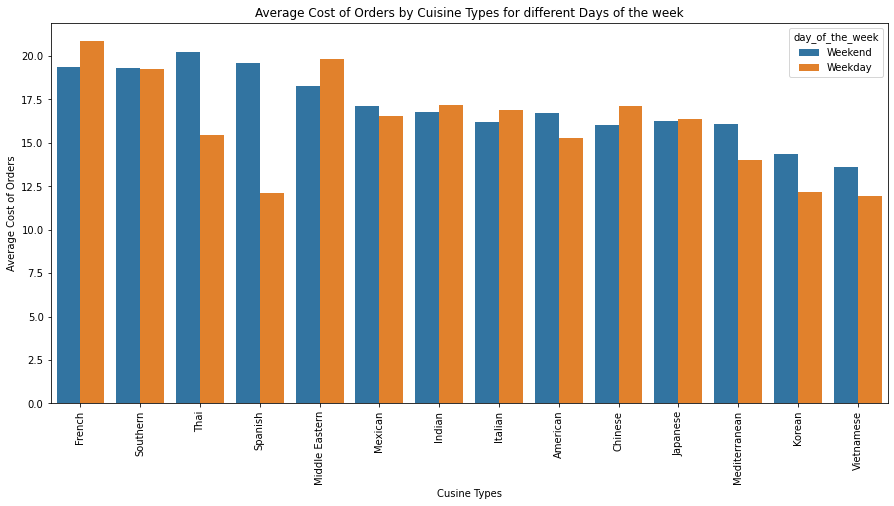

In [ ]:
plt.figure(figsize = (15,7))
graph = sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order',hue='day_of_the_week', ci=False, order=cuisine_cost_df['cuisine_type'])
plt.xticks(rotation = 90)
plt.xlabel('Cusine Types')
plt.ylabel('Average Cost of Orders')
plt.title('Average Cost of Orders by Cuisine Types for different Days of the week')
plt.show()

**Observations**:

*   Cuisines that have an average cost of orders that is more for weekdays as compared to weekends are: French, Middle Eastern, Indian, Italian, and Chinese.
*   Cuisines that have an almost similar average cost of orders for weekdays and weekends are Southern and Japanese.
*   Thai and Spanish cuisines have a much higher average cost of the order on weekdays as compared to weekends.
  

####Cuisine vs Food Preparation time

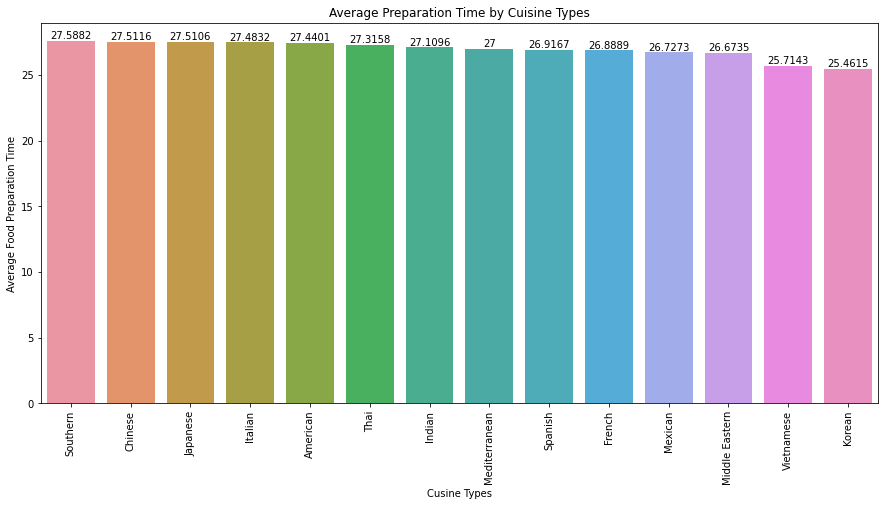

In [ ]:
#Average time required time required to prepare the food once and order has been placed by cuisine type:
cuisine_prep_time_df = df.groupby(['cuisine_type'])['food_preparation_time'].mean().reset_index().sort_values(by='food_preparation_time', ascending=False)

plt.figure(figsize = (15,7))
graph = sns.barplot(data=df, x='cuisine_type', y='food_preparation_time',ci=False,order=cuisine_prep_time_df['cuisine_type'])
plt.xticks(rotation = 90)
plt.xlabel('Cusine Types')
plt.ylabel('Average Food Preparation Time')

for i in graph.containers: 
  graph.bar_label(i,)

plt.title('Average Preparation Time by Cuisine Types')
plt.show()

**Observations**:

*   The average food preparation time ranges from around 25.46 mins to 27.59 mins. 
*   The average food preparation times are almost similar for different cuisine types.
*   Korean cuisine takes the least amount of time to be prepared at 25.46 mins.
*   Southern cuisine takes the most amount of time to be prepared at 27.59 mins.


####Cuisine vs Food Delivery time

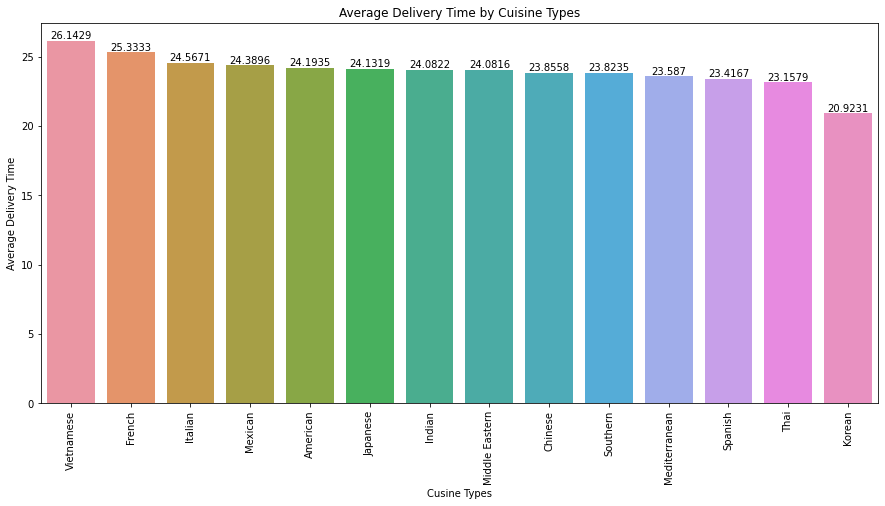

In [ ]:
#Average time required time required to prepare the food once and order has been placed by cuisine type:
cuisine_delivery_time_df = df.groupby(['cuisine_type'])['delivery_time'].mean().reset_index().sort_values(by='delivery_time', ascending=False)

plt.figure(figsize = (15,7))
graph = sns.barplot(data=df, x='cuisine_type', y='delivery_time',ci=False,order=cuisine_delivery_time_df['cuisine_type'])
plt.xticks(rotation = 90)
plt.xlabel('Cusine Types')
plt.ylabel('Average Delivery Time')

for i in graph.containers: 
  graph.bar_label(i,)

plt.title('Average Delivery Time by Cuisine Types')
plt.show()

**Observations**:

*   The average food preparation time ranges from around 20.92 mins to 26.14 mins. 
*   Korean cuisine takes the least amount of time to be delivered.
*   Vietnamese cuisine takes the most amount of time to be delivered.

####Day of the Week vs Delivery time

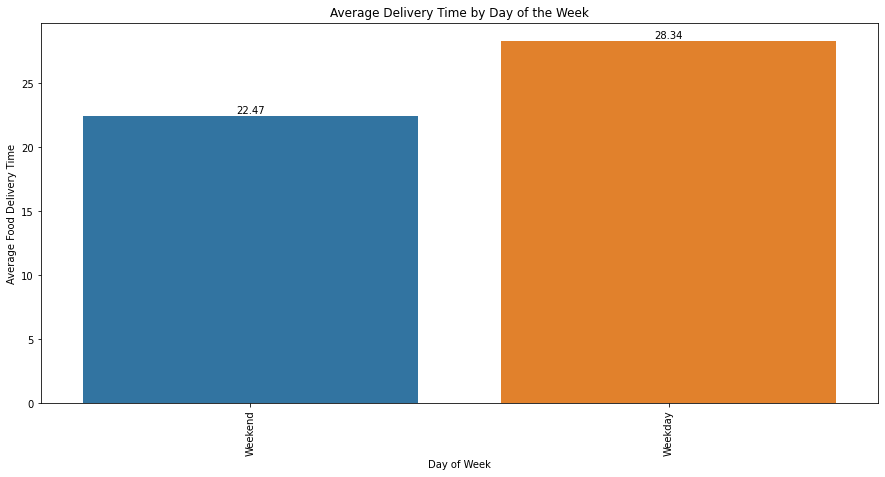

In [ ]:
#Average Delivery Time required by Day of the week:
plt.figure(figsize = (15,7))
graph = sns.barplot(data=df, x='day_of_the_week', y='delivery_time', ci=False)
plt.xticks(rotation = 90)
plt.xlabel('Day of Week')
plt.ylabel('Average Food Delivery Time')

for i in graph.containers: 
  graph.bar_label(i,)

plt.title('Average Delivery Time by Day of the Week')
plt.show()

**Observations**:

*   Average delivery time during weekdays is around 28.34 mins and on weekends is around 22.5 mins, ie. it takes less time on weekends to deliver the order.




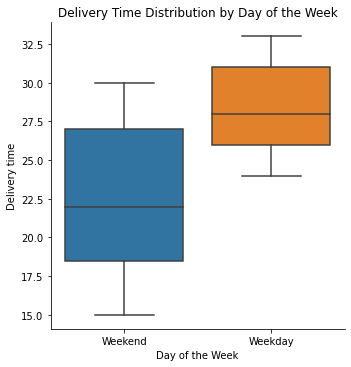

In [ ]:
sns.catplot(data=df, x='day_of_the_week',y='delivery_time', kind='box')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery time')
plt.title('Delivery Time Distribution by Day of the Week')
plt.show()

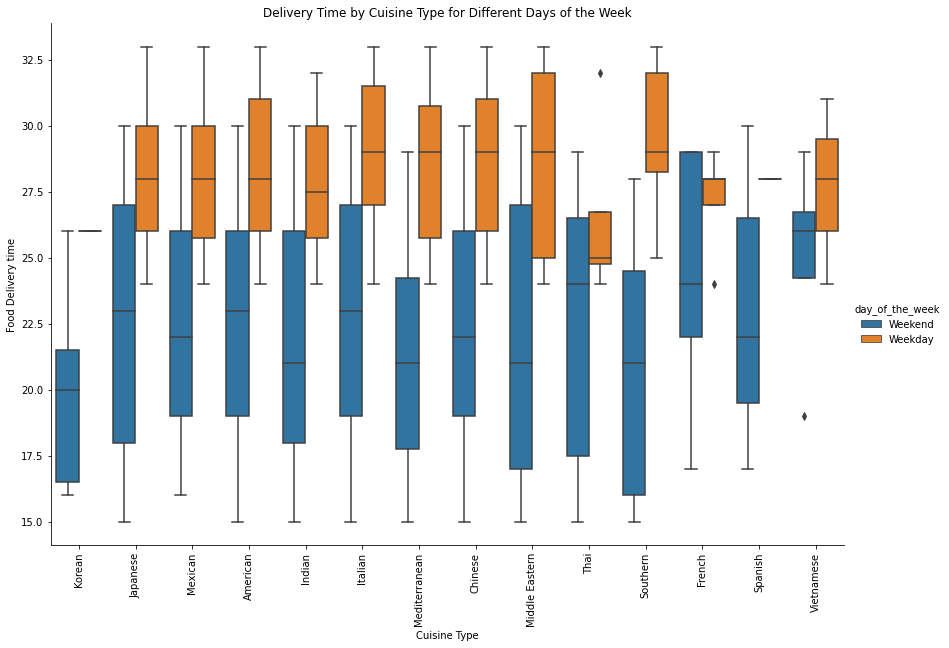

In [ ]:
sns.catplot(data=df, x='cuisine_type',y='delivery_time', kind='box', hue='day_of_the_week', height=8, aspect = 1.5)
plt.xlabel('Cuisine Type')
plt.ylabel('Food Delivery time')
plt.xticks(rotation = 90)
plt.title('Delivery Time by Cuisine Type for Different Days of the Week')
plt.show()

**Observations**:

*   The median value of delivery time during weekdays is 28 mins and that on weekends is 22 mins.
*   The minimum delivery time on weekdays is 24 mins and on weekends is 15 mins. 
    The maximum delivery time on weekdays is 33 mins and on weekends is 30 mins.  
*   Cuisine types Thai and French have outliers for delivery times on weekdays. Vietnamese cuisine has outliers on weekends.
*   No of orders for Korean and Spanish Cuisine types are very low on weekdays.











####Rating vs Delivery time

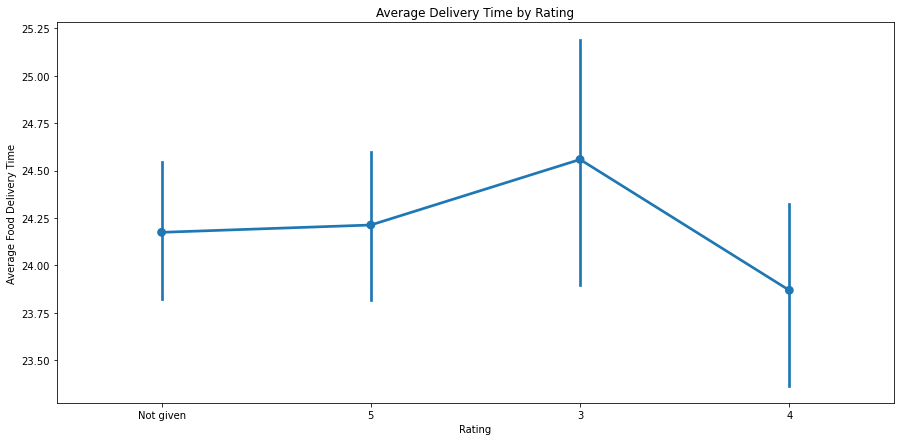

In [ ]:
plt.figure(figsize = (15,7))
#sns.catplot(,kind='point')
sns.pointplot(data=df, x='rating', y='delivery_time')
plt.xlabel('Rating')
plt.ylabel('Average Food Delivery Time')
plt.title('Average Delivery Time by Rating')
plt.show()

**Observations**:

*   The average food delivery time categorized by rating is as follows:

| Rating          | Average Delivery Time of the orders (mins)|
| --------------- | ----------------------------------------- |
|  5              |                                     24.21 |
|  4              |                                     23.87 |
|  3              |                                     24.59 |
|  Not given      |                                     24.17 |

*    The rating could be affected by the amount of time taken to deliver the food, as the lowest rating takes the highest amount to be delivered.
  

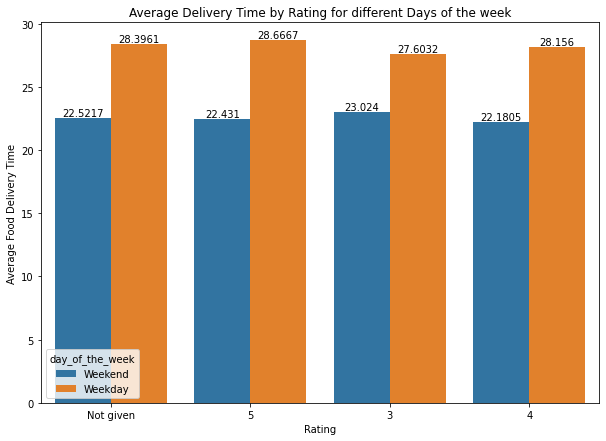

In [ ]:
plt.figure(figsize=(10,7))
graph = sns.barplot(data=df, x='rating', y='delivery_time', hue='day_of_the_week', ci=False)
plt.xlabel('Rating')
plt.ylabel('Average Food Delivery Time')

for i in graph.containers: 
  graph.bar_label(i,)

plt.title('Average Delivery Time by Rating for different Days of the week')
plt.show()

**Observations**:

*   For all ratings, the average delivery time is much higher on weekdays as compared to that on weekends.
  



####Rating vs Food preparation time

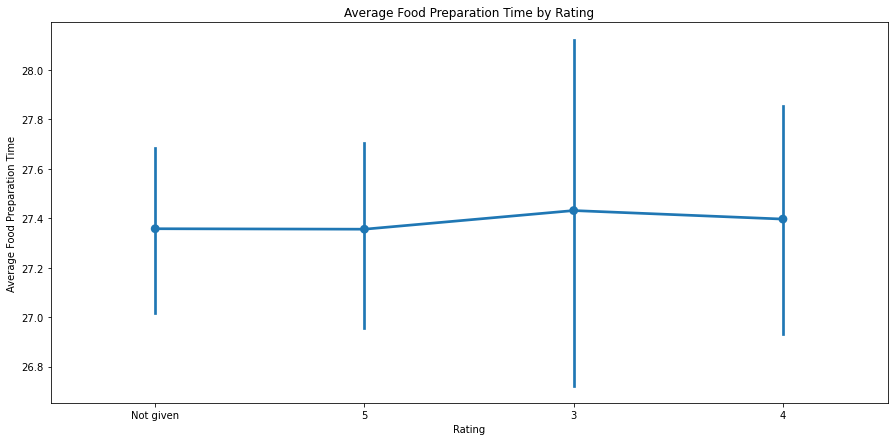

In [ ]:
plt.figure(figsize = (15,7))
graph = sns.pointplot(data=df, x='rating', y='food_preparation_time')
plt.xlabel('Rating')
plt.ylabel('Average Food Preparation Time')
plt.title('Average Food Preparation Time by Rating')
plt.show()

**Observations**:

*   The average food preparation time categorized by rating is as follows:

| Rating          | Average Preparation Time of the orders (mins)|
| --------------- | -------------------------------------------- |
|  5              |                                        27.35 |
|  4              |                                        27.40 |
|  3              |                                        27.43 |
|  Not given      |                                        27.36 |

*    The rating does not seem to be affected by the amount of time taken to prepare the food, as time taken to prepare the food is almost same for all the four values of rating. 

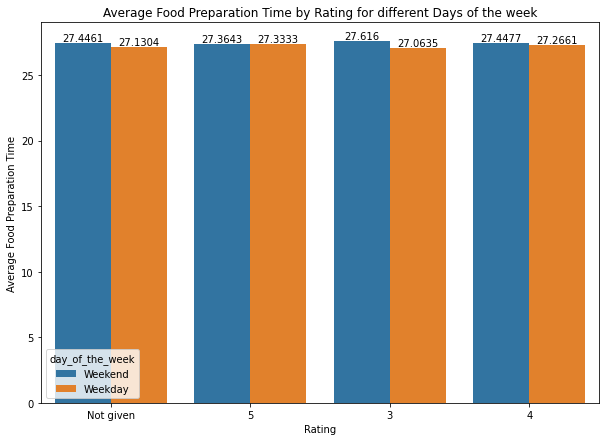

In [ ]:
plt.figure(figsize=(10,7))
graph = sns.barplot(data=df, x='rating', y='food_preparation_time', hue='day_of_the_week',ci=False)
plt.xlabel('Rating')
plt.ylabel('Average Food Preparation Time')

for i in graph.containers: 
  graph.bar_label(i,)
plt.title('Average Food Preparation Time by Rating for different Days of the week')
plt.show()

**Observations**:

*   For all ratings, the average value of time required to prepare the food is slightly higher on the weekends as compared to than on weekdays.





####Rating vs Cost of the order

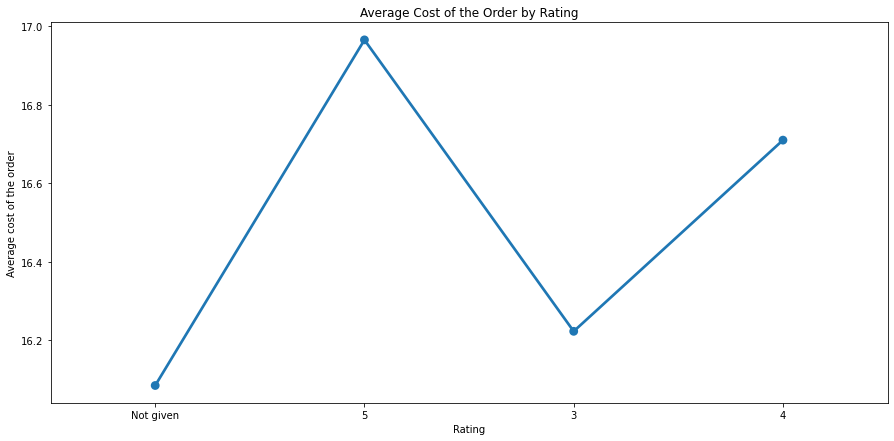

In [ ]:
plt.figure(figsize = (15,7))
sns.pointplot(data=df, x='rating', y='cost_of_the_order', ci=False)
plt.xlabel('Rating')
plt.ylabel('Average cost of the order')
plt.title('Average Cost of the Order by Rating')
plt.show()

**Observations**:

*   The average cost of orders categorized by rating are:

| Rating          | Average orders value ($)|
| --------------- | ----------------------- |
|  5              |                   16.97 |
|  4              |                   16.71 |
|  3              |                   16.22 |
|  Not given      |                   16.08 |

*    Orders with higher ratings tend to be more expensive than those with lower ratings.

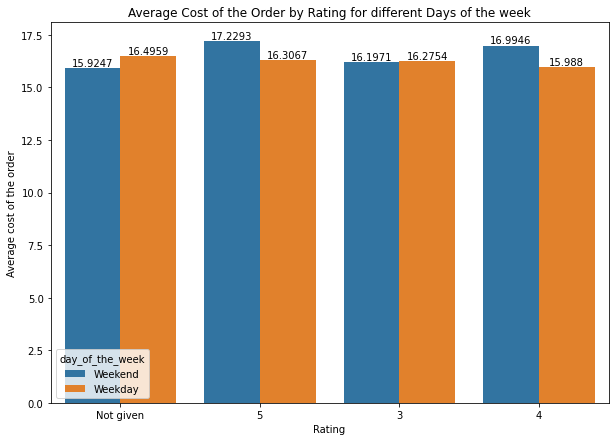

In [ ]:
plt.figure(figsize=(10,7))
graph = sns.barplot(data=df, x='rating', y='cost_of_the_order', hue='day_of_the_week', ci=False)
plt.xlabel('Rating')
plt.ylabel('Average cost of the order')

for i in graph.containers: 
  graph.bar_label(i,)
plt.title('Average Cost of the Order by Rating for different Days of the week')
plt.show()

**Observations**:

*   For orders rated highly (ie, rating = 5), the average cost of the orders is higher on weekends as compared to those on weekdays. 
*    For orders with a low rating (ie, rating = 3) and those that have not been rated, the average cost of orders is higher on weekdays as compared to those on weekends.

####Cost vs Day of week

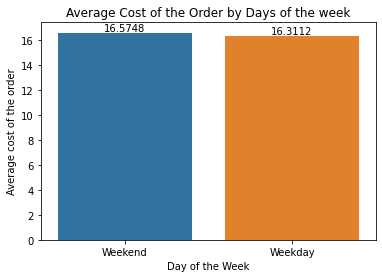

In [ ]:
graph = sns.barplot(data=df, x='day_of_the_week',y='cost_of_the_order', ci=False)
plt.xlabel('Day of the Week')
plt.ylabel('Average cost of the order')

for i in graph.containers: 
  graph.bar_label(i,)
plt.title('Average Cost of the Order by Days of the week')
plt.show()

**Observations**:
*   The average cost of the order on weekends is slightly more as compared to that on weekends.




####Correlation among variables

In [ ]:
correlation_table = df[['cost_of_the_order','food_preparation_time','delivery_time']].corr()
print(correlation_table)

                       cost_of_the_order  food_preparation_time  delivery_time
cost_of_the_order               1.000000               0.041527      -0.029949
food_preparation_time           0.041527               1.000000       0.011094
delivery_time                  -0.029949               0.011094       1.000000


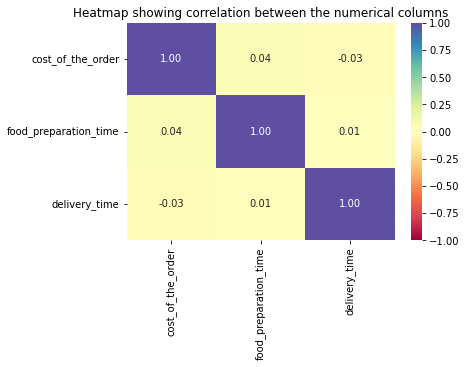

In [ ]:
sns.heatmap(data=correlation_table, annot= True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.title('Heatmap showing correlation between the numerical columns')
plt.show()

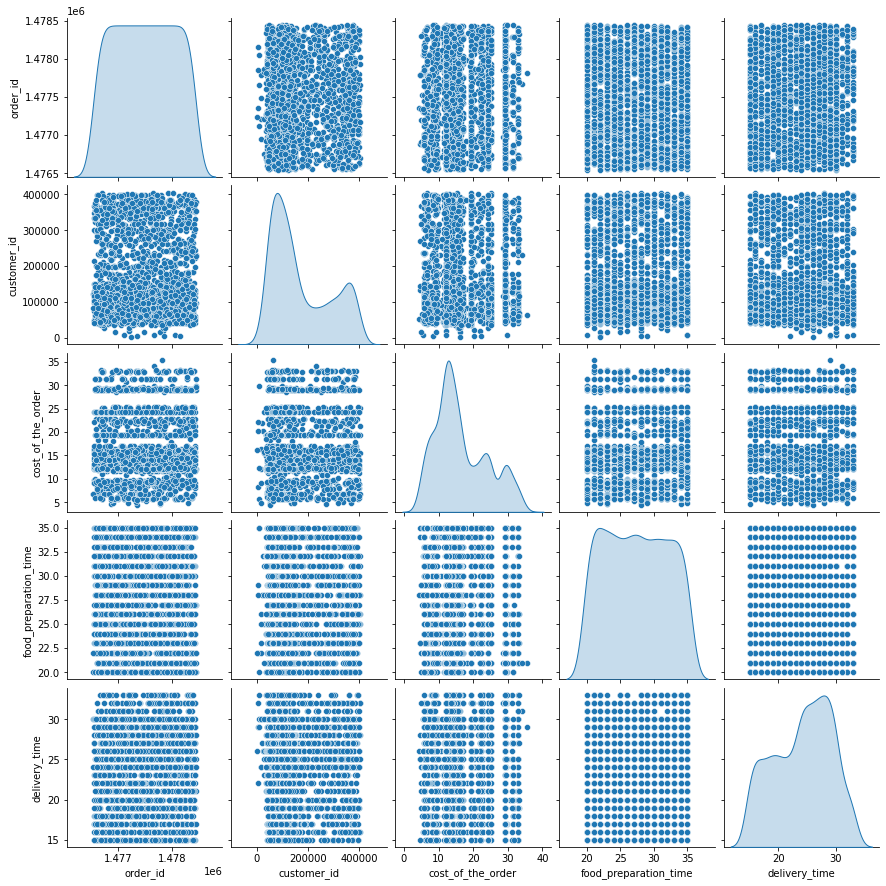

In [ ]:
sns.pairplot(data=df, diag_kind="kde");
plt.show()

**Observations**:

*   There is no strong correlation between the different numerical variables.

#### Analyzing the revenue generated by the different restaurants.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

In [ ]:
total_cost_of_all_orders = df['cost_of_the_order'].sum()

total_cost_by_rest =df.groupby(['restaurant_name']).agg(no_of_orders=('restaurant_name','count'), total_cost=('cost_of_the_order','sum')).reset_index()
total_cost_by_rest['percentage_total_cost'] = (total_cost_by_rest['total_cost']/total_cost_of_all_orders)*100
print(total_cost_by_rest.sort_values(by='total_cost', ascending=False).head(15))

                   restaurant_name  no_of_orders  total_cost  \
136                    Shake Shack           219     3579.53   
153              The Meatball Shop           132     2145.21   
21               Blue Ribbon Sushi           119     1903.95   
20       Blue Ribbon Fried Chicken            96     1662.29   
109                           Parm            68     1112.76   
121               RedFarm Broadway            59      965.13   
122                 RedFarm Hudson            55      921.21   
145                            TAO            49      834.50   
66                     Han Dynasty            46      755.29   
22   Blue Ribbon Sushi Bar & Grill            44      666.62   
125                       Rubirosa            37      660.45   
143               Sushi of Gari 46            37      640.87   
103                 Nobu Next Door            42      623.67   
56     Five Guys Burgers and Fries            29      506.47   
100                         Momoya      

**Observations**: 
*   The top 5 most popular restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
*   Shake Shack gets the highest no of orders and accounts for almost 11% of the total cost of all orders.
*   All of the top 5 restaurants have total costs greater than $1000. 
*   Number of restaurants having total costs greater than \$500 is 14.
*   Out of all restaurants, Hunan Manor has the lowest total cost of all orders.



In [ ]:
# Calculating the no of orders a restaurant has on a Weekday:
df.query('day_of_the_week=="Weekday"').groupby(['restaurant_name'])['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)

,restaurant_name,order_id
90,Shake Shack,74
101,The Meatball Shop,37
18,Blue Ribbon Sushi,34
71,Parm,26
17,Blue Ribbon Fried Chicken,22
...,...,...
32,Dig Inn Seasonal Market,1
85,Sarabeth's,1
31,Cho Dang Gol,1
87,Sarabeth's West,1


In [ ]:
# Calculating the no of orders a restaurant has on a Weekend:
df.query('day_of_the_week=="Weekend"').groupby(['restaurant_name'])['order_id'].count().reset_index().sort_values(by='order_id', ascending=False)

,restaurant_name,order_id
118,Shake Shack,145
134,The Meatball Shop,95
16,Blue Ribbon Sushi,85
15,Blue Ribbon Fried Chicken,74
106,RedFarm Broadway,44
...,...,...
36,Crema Restaurante,1
35,Coppola's East,1
34,Cipriani Le Specialita,1
53,Galli Restaurant,1


**Observation**: 
*  Both on weekdays and weekends the top 3 restaurants in terms of no. of orders received are the same, ie. Shake Shack, The Meatball Shop, and Blue Ribbon Sushi.

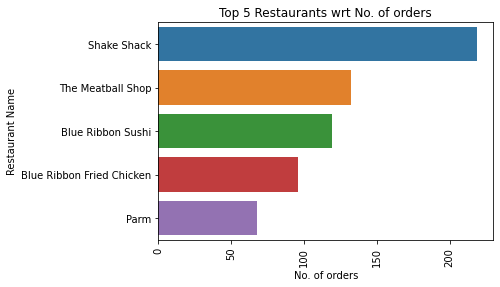

In [ ]:
# Graph showing top 5 restaurants in terms of no. of orders:
restaurant_orders = df.groupby(['restaurant_name']).agg(order_count=('restaurant_name','count')).reset_index().sort_values(by='order_count', ascending=False).head(5)

sns.barplot(data=restaurant_orders, y='restaurant_name', x= 'order_count', order=restaurant_orders['restaurant_name'])
plt.xticks(rotation=90)
plt.xlabel('No. of orders')
plt.ylabel('Restaurant Name')
plt.title('Top 5 Restaurants wrt No. of orders')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
restautants_with_rating = df.query('rating!="Not given"').copy()
restautants_with_rating['rating'] = restautants_with_rating['rating'].astype(int)

d= restautants_with_rating.groupby(['restaurant_name']).agg(count_rating=('rating','count'),aver_rating=('rating',np.mean)).reset_index()
list(d.loc[(d['count_rating']>50) & (d['aver_rating']>4),'restaurant_name'])

['Blue Ribbon Fried Chicken',
 'Blue Ribbon Sushi',
 'Shake Shack',
 'The Meatball Shop']

**Observations**:

*  The restaurants fulfilling the criteria to get the promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def company_charge_calc(cost_of_order): 
  if cost_of_order > 20:
    return cost_of_order*(25/100)
  elif cost_of_order > 5:
    return cost_of_order*(15/100)
  return 0

df['net_revenue'] = df['cost_of_the_order'].apply(company_charge_calc)
total_net_revenue = round(df['net_revenue'].sum(),2)

print('The net revenue is around $',total_net_revenue,sep='')

The net revenue is around $6166.3


**Observations**:

*   Total net revenue generated across all orders is around $6166.3.




### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

pcnt_delivery_time_greater_60min= round((df.loc[df['total_delivery_time']>60].shape[0]/df.shape[0])*100,2)
print('The percentage of orders that require more than 60 mins to get delivered from the time the order is placed is {}%'.format(pcnt_delivery_time_greater_60min))

The percentage of orders that require more than 60 mins to get delivered from the time the order is placed is 10.54%


**Observations**:


* Total percentage of orders which take more than 60 mins to get delivered from the time of order placement is almost 10.54%




### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
mean_delivery_times = df.groupby(['day_of_the_week']).agg(mean_delivery_time=('delivery_time','mean')).reset_index()
print(mean_delivery_times.loc[mean_delivery_times['day_of_the_week']=='Weekday','mean_delivery_time'][0])
print(mean_delivery_times.loc[mean_delivery_times['day_of_the_week']=='Weekend','mean_delivery_time'][1])

28.340036563071298
22.4700222057735


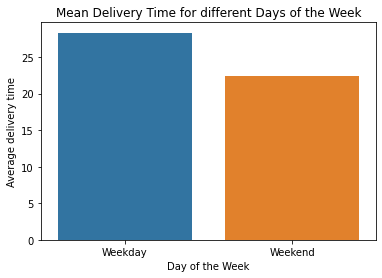

In [ ]:
sns.barplot(data=mean_delivery_times, x='day_of_the_week', y='mean_delivery_time' )
plt.xlabel('Day of the Week')
plt.ylabel('Average delivery time')
plt.title('Mean Delivery Time for different Days of the Week')
plt.savefig("/content/drive/MyDrive/Univ_Texas/Project_FoodHub/avg_delivery_time.jpg", bbox_inches='tight')
plt.show()

**Observations**:

*   The mean delivery time for weekdays is more than that of weekends.
*   The average value for delivery time on weekdays is around 28.34 mins, whereas that for weekends is around 22.47 mins.




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*   Restaurants that get the highest number of orders are as follows:

| Name                      | No of orders |
| ------------------------- | ------------ |
| Shake Shack               |         219  |
| The Meatball Shop         |         132  |
| Blue Ribbon Sushi         |         119  |
| Blue Ribbon Fried Chicken |          96  |
| Parm                      |          68  |

*   Most liked cuisines are as follows:

| Name            | No of orders |
| --------------- | ------------ |
|  American       |         584  |
|  Japanese       |         470  |
|  Italian        |         298  |
|  Chinese        |         215  |
|  Mexican        |          77  |

*   The no of orders placed on a weekend is more than twice of that placed on weekdays.

| Day of the week | No of orders |
| --------------- | ------------ |
|  Weekday        |         547  |
|  Weekend        |        1351  |

*   Time taken on weekends to deliver the food is lesser as compared to that on weekdays. This could be because of higher traffic on weekdays.

| Day of the week | Average Time taken to deliver (mins)|
| --------------- | ----------------------------------- |
|  Weekday        |                                 28  |
|  Weekend        |                                 22  |

*   Almost 39% of orders are unrated. Orders with higher rating tend to be more expensive as compared to those with lower rating.

| Rating          | Average orders value ($)|
| --------------- | ----------------------- |
|  5              |                   16.97 |
|  4              |                   16.71 |
|  3              |                   16.22 |
|  Not given      |                   16.08 |

*   The rating could be affected by the amount of time taken to deliver the food, as the lowest rating takes the highest amount to be delivered.

| Rating          | Average Delivery Time of the orders (mins)|
| --------------- | ----------------------------------------- |
|  5              |                                     24.21 |
|  4              |                                     23.87 |
|  3              |                                     24.59 |
|  Not given      |                                     24.17 |



### Recommendations:

*  FoodHub should partner with more restaurants serving highly popular cuisines like American, Japanese, Italian, Chinese and Mexian.
*  Promotional offers should be given to highly popular restaurants, such as  Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop, so that the amount of sales increases further which increases the revenue earned by FoodHub.
*   Offers/coupons can be provided to customers so that the amount of sales increases (especially on weekdays).
*   FoodHub can highlight different restaurants based on the customers' preferred cuisine and rating values so that the customers try new restaurants which in turn increases the revenue earned.
*   FoodHub needs to investigate further on the higher time taken for food to be delivered on weekdays and how to reduce the same so that customer satisfaction increases. One way to do this could be by recruiting more drivers to reduce the wait time. 
*   FoodHub needs to investigate the high number of unrated orders and find out if it is easy for the customer to rate the order. 
*   FoodHub also need to investigate the steps to be taken with  restaurants that continue to recieve low rating over a longer duration of time.






---